Daily Weather Statistics:
         Date  Avg Temp (°C)  Max Temp (°C)  Min Temp (°C)  Avg Humidity (%)  \
0  2024-11-10        9.99000          14.47           7.32            42.250   
1  2024-11-11       14.89875          18.04          12.82            72.750   
2  2024-11-12       12.14000          16.54           9.59            52.625   
3  2024-11-13        6.83750          10.60           3.73            38.625   
4  2024-11-14        9.66125          12.52           8.29            41.000   
5  2024-11-15       10.21000          11.94           9.58            76.750   

   Avg Wind Speed (m/s)  
0               3.14750  
1               5.50875  
2               6.93000  
3               5.00125  
4               2.39000  
5               2.64750  


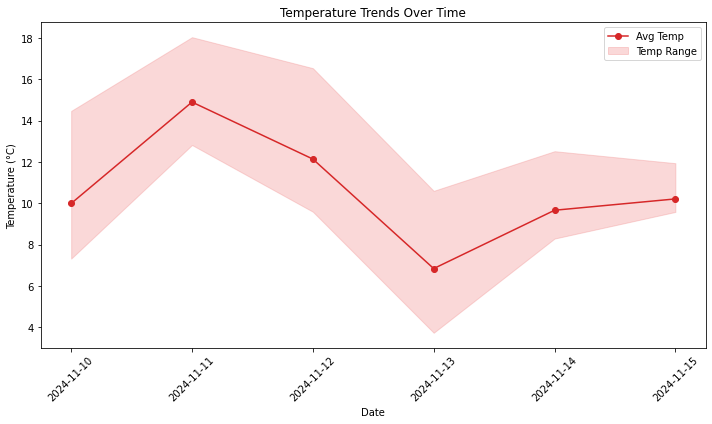

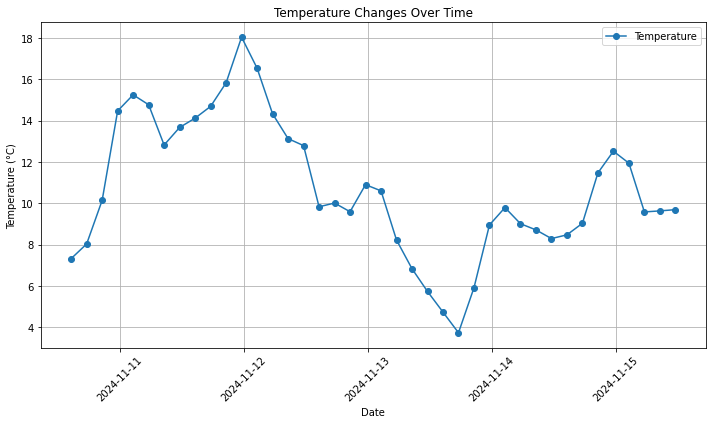

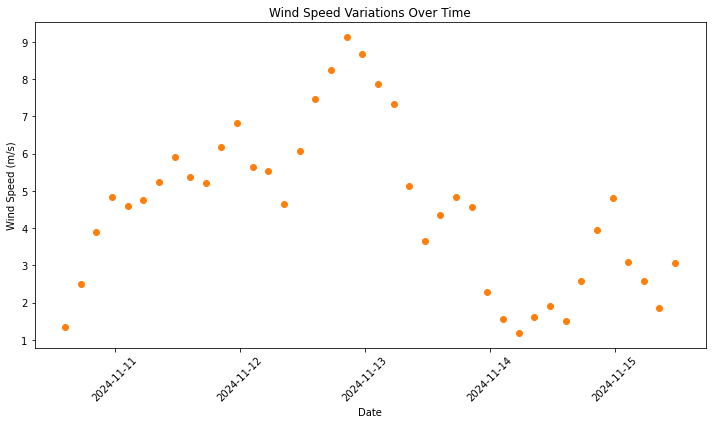

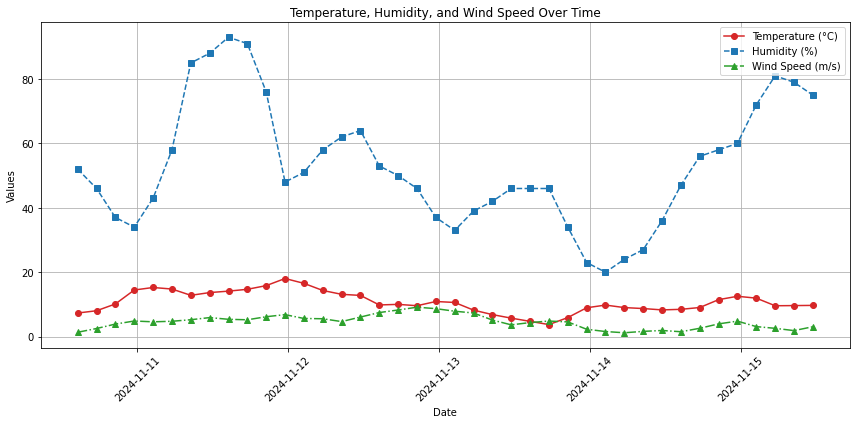

In [17]:
!pip install requests pandas matplotlib seaborn geopandas folium
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

api_key = '601585a696e04c3219ac52bc135381ed'
city = 'New York'  # You can change this to any other city
api_url = f'http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={api_key}&units=metric'

response = requests.get(api_url)
weather_data = response.json()

if 'list' not in weather_data:
    print("Error in fetching data. Please check your API key or city name.")
else:
    forecast_list = weather_data['list']
    data = []
    for forecast in forecast_list:
        date_time = datetime.datetime.fromtimestamp(forecast['dt'])
        temp = forecast['main']['temp']
        humidity = forecast['main']['humidity']
        wind_speed = forecast['wind']['speed']
        description = forecast['weather'][0]['description']
        
        data.append([date_time, temp, humidity, wind_speed, description])
    
    df = pd.DataFrame(data, columns=['DateTime', 'Temperature', 'Humidity', 'Wind Speed', 'Description'])

df

# Group data by date for daily analysis
df['Date'] = df['DateTime'].dt.date

# Calculate daily statistics
daily_stats = df.groupby('Date').agg({
    'Temperature': ['mean', 'max', 'min'],
    'Humidity': 'mean',
    'Wind Speed': 'mean'
}).reset_index()

# Rename columns for clarity
daily_stats.columns = ['Date', 'Avg Temp (°C)', 'Max Temp (°C)', 'Min Temp (°C)', 'Avg Humidity (%)', 'Avg Wind Speed (m/s)']

# Display daily statistics
print("Daily Weather Statistics:")
print(daily_stats)

# Identify trends over time (e.g., average temperature trend)
plt.figure(figsize=(10, 6))
plt.plot(daily_stats['Date'], daily_stats['Avg Temp (°C)'], marker='o', linestyle='-', color='tab:red', label='Avg Temp')
plt.fill_between(daily_stats['Date'], daily_stats['Min Temp (°C)'], daily_stats['Max Temp (°C)'], color='lightcoral', alpha=0.3, label='Temp Range')
plt.title("Temperature Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


# Line chart for temperature changes
plt.figure(figsize=(10, 6))
plt.plot(df['DateTime'], df['Temperature'], marker='o', linestyle='-', color='tab:blue', label='Temperature')
plt.title("Temperature Changes Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(df['DateTime'], df['Wind Speed'], color='tab:orange')
plt.title("Wind Speed Variations Over Time")
plt.xlabel("Date")
plt.ylabel("Wind Speed (m/s)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(df['DateTime'], df['Temperature'], marker='o', linestyle='-', color='tab:red', label='Temperature (°C)')
plt.plot(df['DateTime'], df['Humidity'], marker='s', linestyle='--', color='tab:blue', label='Humidity (%)')
plt.plot(df['DateTime'], df['Wind Speed'], marker='^', linestyle='-.', color='tab:green', label='Wind Speed (m/s)')
plt.title("Temperature, Humidity, and Wind Speed Over Time")
plt.xlabel("Date")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




In [18]:
# Daily aggregation
daily_summary = df.resample('D', on='DateTime').agg({
    'Temperature': 'mean',           # Average temperature
    'Humidity': 'mean',          # Total precipitation
    'Wind Speed': 'mean'             # Average wind speed
}).reset_index()
print("Daily summary : \n",daily_summary)

Daily summary : 
     DateTime  Temperature  Humidity  Wind Speed
0 2024-11-10      9.99000    42.250     3.14750
1 2024-11-11     14.89875    72.750     5.50875
2 2024-11-12     12.14000    52.625     6.93000
3 2024-11-13      6.83750    38.625     5.00125
4 2024-11-14      9.66125    41.000     2.39000
5 2024-11-15     10.21000    76.750     2.64750


In [19]:
# Monthly aggregation
monthly_summary = df.resample('M', on='DateTime').agg({
    'Temperature': 'mean',           # Average temperature
    'Humidity': 'mean',          # Total precipitation
    'Wind Speed': 'mean'             # Average wind speed
}).reset_index()

print("\n\nMonthly summary : \n",monthly_summary)



Monthly summary : 
     DateTime  Temperature  Humidity  Wind Speed
0 2024-11-30      10.7275      52.9      4.5455


In [20]:
# Function to categorize seasons
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

In [21]:
# Add a 'Season' column to the DataFrame
df['Season'] = df['DateTime'].apply(get_season)

In [22]:
# Seasonal aggregation
seasonal_summary = df.groupby('Season').agg({
    'Temperature': 'mean',           # Average temperature
    'Humidity': 'mean',          # Total precipitation
    'Wind Speed': 'mean'             # Average wind speed
}).reset_index()

print("\n\nSeasonal summary : \n",seasonal_summary)



Seasonal summary : 
   Season  Temperature  Humidity  Wind Speed
0   Fall      10.7275      52.9      4.5455


In [23]:

import folium
# Example data
data = {
    'Location': ['New York', 'Los Angeles', 'Chicago'],
    'Latitude': [40.7128, 34.0522, 41.8781],
    'Longitude': [-74.0060, -118.2437, -87.6298],
    'Temperature': [15, 20, 12],
    'Wind Speed': [5, 3, 4],
    'Precipitation': [1, 0, 2]
}
sample_df = pd.DataFrame(data)
# Create a folium map centered at the mean location
m = folium.Map(location=[sample_df['Latitude'].mean(), sample_df['Longitude'].mean()], zoom_start=4)
# Add markers for each location
for index, row in sample_df.iterrows():
    popup_text = f"Location: {row['Location']}<br>Temperature: {row['Temperature']}°C<br>Wind Speed: {row['Wind Speed']} m/s<br>Precipitation: {row['Precipitation']} mm"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)
# Save the map
m.save('weather_map.html')

In [24]:
# To display map directly in Jupyter Notebook
m

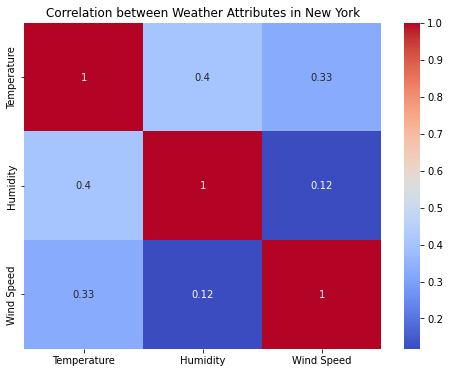

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Temperature', 'Humidity', 'Wind Speed']].corr(), annot=True, cmap='coolwarm')
plt.title(f"Correlation between Weather Attributes in {city}")
plt.show()